In [88]:
# Helper packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import compose
from sklearn import cross_decomposition
from sklearn import decomposition
from sklearn import model_selection
from sklearn import linear_model
from sklearn import pipeline

# Helper packages
import numpy as np
import pandas as pd
from plotnine import *

# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [75]:
df = pd.read_csv("../EDA/cleaned_data.csv")
df_Train =  pd.read_csv("../EDA/train.csv")
df_Test =  pd.read_csv("../EDA/test.csv")

In [76]:
df_Train

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable,Manu_Country
0,Toyota,Camry,2020,Saudi,Brown,Semi Full,2.5,Gas,Automatic,38000,Riyadh,1364,False,Japan
1,Chevrolet,Suburban,2009,Saudi,White,Standard,5.3,Gas,Automatic,255,Riyadh,36000,False,America
2,Toyota,Corolla,2018,Saudi,White,Standard,1.6,Gas,Automatic,19190,Jeddah,55000,False,Japan
3,Isuzu,Dyna,2003,Saudi,White,Standard,8.5,Diesel,Manual,330,Riyadh,40000,False,Japan
4,Toyota,Land Cruiser,2016,Gulf Arabic,Black,Full,5.7,Gas,Automatic,122000,Dammam,200000,False,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,Toyota,Ciocca,2010,Saudi,Grey,Semi Full,5.7,Gas,Automatic,270000,Jubail,65000,False,Japan
3293,Mercedes,CLA,2019,Gulf Arabic,White,Full,2.0,Gas,Automatic,28000,Riyadh,149000,False,Germany
3294,Mercedes,CLS,2014,Saudi,Brown,Full,3.5,Gas,Automatic,130,Jeddah,100000,False,Germany
3295,GMC,Acadia,2014,Saudi,Red,Full,3.6,Gas,Automatic,250000,Dammam,50000,False,America


In [77]:
X_train = df_Train.drop("Price", axis=1)
y_train = df_Train[["Price"]]

In [78]:
X_train


,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Negotiable,Manu_Country
0,Toyota,Camry,2020,Saudi,Brown,Semi Full,2.5,Gas,Automatic,38000,Riyadh,False,Japan
1,Chevrolet,Suburban,2009,Saudi,White,Standard,5.3,Gas,Automatic,255,Riyadh,False,America
2,Toyota,Corolla,2018,Saudi,White,Standard,1.6,Gas,Automatic,19190,Jeddah,False,Japan
3,Isuzu,Dyna,2003,Saudi,White,Standard,8.5,Diesel,Manual,330,Riyadh,False,Japan
4,Toyota,Land Cruiser,2016,Gulf Arabic,Black,Full,5.7,Gas,Automatic,122000,Dammam,False,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,Toyota,Ciocca,2010,Saudi,Grey,Semi Full,5.7,Gas,Automatic,270000,Jubail,False,Japan
3293,Mercedes,CLA,2019,Gulf Arabic,White,Full,2.0,Gas,Automatic,28000,Riyadh,False,Germany
3294,Mercedes,CLS,2014,Saudi,Brown,Full,3.5,Gas,Automatic,130,Jeddah,False,Germany
3295,GMC,Acadia,2014,Saudi,Red,Full,3.6,Gas,Automatic,250000,Dammam,False,America


In [79]:
y_train

,Price
0,1364
1,36000
2,55000
3,40000
4,200000
...,...
3292,65000
3293,149000
3294,100000
3295,50000


In [80]:
lm_mod = linear_model.LinearRegression()

# fit linear model with only Gr_Liv_Area feature
lm_fit = lm_mod.fit(X_train[["Mileage"]], y_train.Price)

In [81]:
lm_fit.predict([[38000]])

array([76030.2532115])

In [82]:
lm_fit.intercept_

80183.58513603423

In [83]:
lm_fit.coef_

array([-0.10929821])

In [84]:
# create linear regression model object
lm_mod = linear_model.LinearRegression()

# fit linear model with only Gr_Liv_Area and Year_Built feature
lm_fit = lm_mod.fit(X_train[["Mileage", "Year"]], y_train)

In [85]:
lm_fit.intercept_

array([-5405652.41106861])

In [86]:
lm_fit.coef_

array([[-5.90554388e-02,  2.71961573e+03]])

In [90]:
features = X_train[["Mileage", "Year"]]

# Step 2: standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(features)

# Step 3: create model object
ridge_mod = Ridge(alpha=1)

# Step 4: fit/train model
ridge_fit = ridge_mod.fit(X_train_scaled, y_train)

In [91]:
ridge_fit.coef_

array([[-6038.36997055, 13591.00534436]])

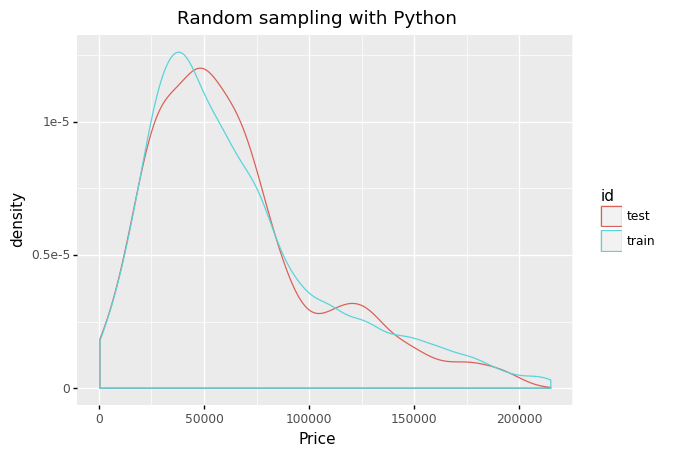

<ggplot: (-9223371936525014717)>

In [94]:
df_Train['id'] = 'train'
df_Test['id'] = 'test'

(ggplot(pd.concat([df_Train, df_Test]), aes('Price', color='id'))
 + geom_density()
 + ggtitle("Random sampling with Python"))